In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:

data_dir = "/Users/coopg/Github/group6-project/"

csv = data_dir + "Seattle Aquarium (pH).csv"
df_SA_pH = pd.read_csv(csv)
df_SA_pH_Cleaned = df_SA_pH.loc[df_SA_pH["pH"]<=10,:]


csv = data_dir + "Seattle Aquarium (Water Temperature).csv"
df_SA_WT = pd.read_csv(csv)
df_SA_WT_Cleaned = df_SA_WT.loc[df_SA_WT["Water Temp"]<=100,:]

combined_Seattle_df = pd.merge(left=df_SA_pH_Cleaned, right=df_SA_WT_Cleaned, how='left', left_on='Date and Time', right_on='Date and Time')

In [27]:
datesandtimes = []

for dateTime in combined_Seattle_df["Date and Time"]:
    datesandtimes.append(dateTime[0:19].replace("T", " "))

combined_Seattle_df["Date and Time"] = datesandtimes

combined_Seattle_df = combined_Seattle_df.set_index('Date and Time')
print(combined_Seattle_df.head())

                       pH  Water Temp
Date and Time                        
2023-01-28 23:00:00  7.68     47.5358
2023-01-28 23:00:00  7.68     47.1002
2023-01-28 23:00:00  7.75     47.5358
2023-01-28 23:00:00  7.75     47.1002
2023-01-28 23:15:00  7.68     47.5322


In [28]:
combined_Seattle_df.corr()
print(combined_Seattle_df.head())

                       pH  Water Temp
Date and Time                        
2023-01-28 23:00:00  7.68     47.5358
2023-01-28 23:00:00  7.68     47.1002
2023-01-28 23:00:00  7.75     47.5358
2023-01-28 23:00:00  7.75     47.1002
2023-01-28 23:15:00  7.68     47.5322


In [36]:
import statsmodels.formula.api as smf
new_df = combined_Seattle_df.rename(columns={'Water Temp':'Water_Temp'})

model = smf.ols(formula='pH ~ Water_Temp',data=new_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     201.7
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.37e-45
Time:                        17:13:37   Log-Likelihood:                 33241.
No. Observations:               22568   AIC:                        -6.648e+04
Df Residuals:                   22566   BIC:                        -6.646e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1999      0.031    262.666      0.0

<Axes: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

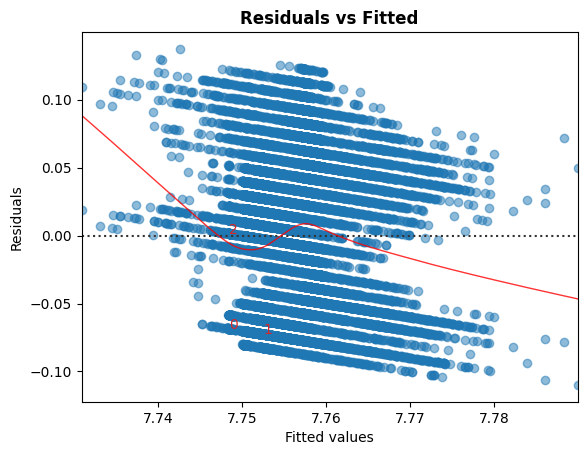

In [30]:
from utils import Linear_Reg_Diagnostic

diagnostics = Linear_Reg_Diagnostic(model)
diagnostics.residual_plot()

<Axes: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

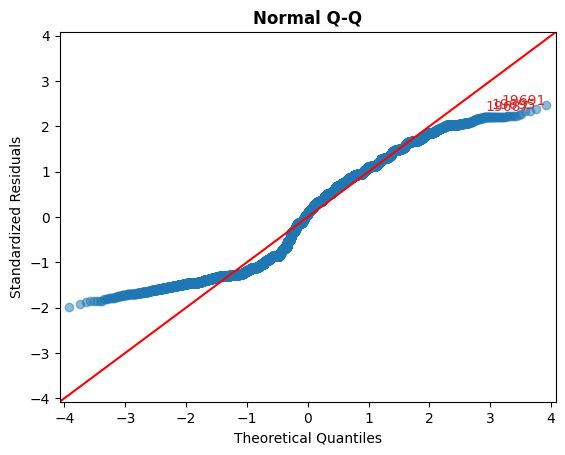

In [31]:
diagnostics.qq_plot()


<Axes: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>

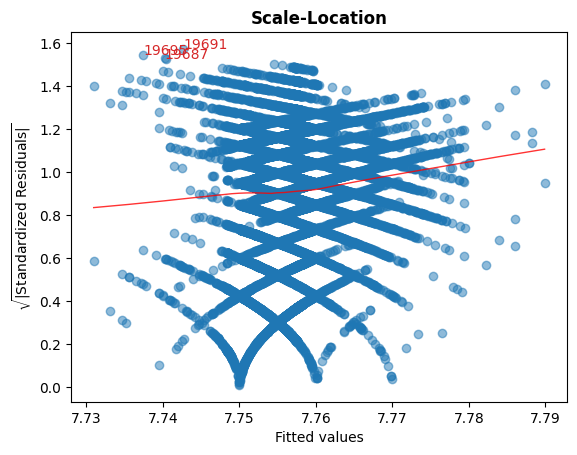

In [32]:
diagnostics.scale_location_plot()


<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

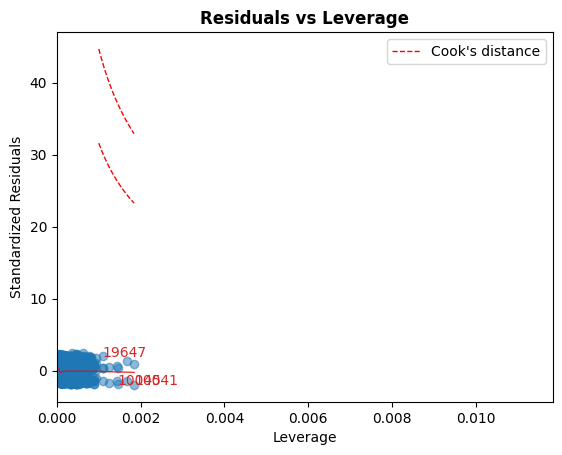

In [33]:
diagnostics.leverage_plot()

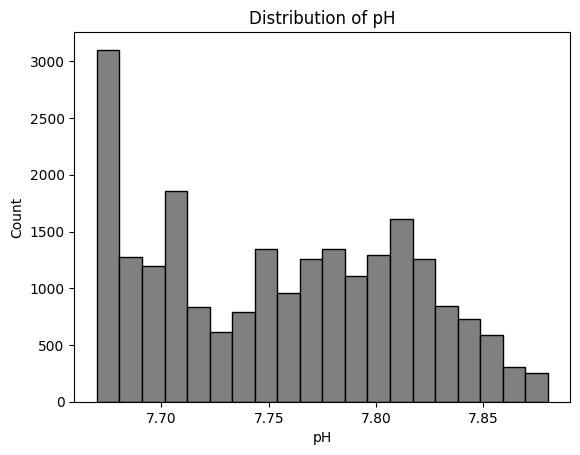

In [34]:
figure, ax = plt.subplots()
ax.hist(new_df['pH'],bins=20, color="grey", edgecolor='black') # specify bins, color, and edge color
ax.set_xlabel('pH') # x axis label
ax.set_ylabel('Count') # y axis label
ax.set_title('Distribution of pH') # add title
plt.show()

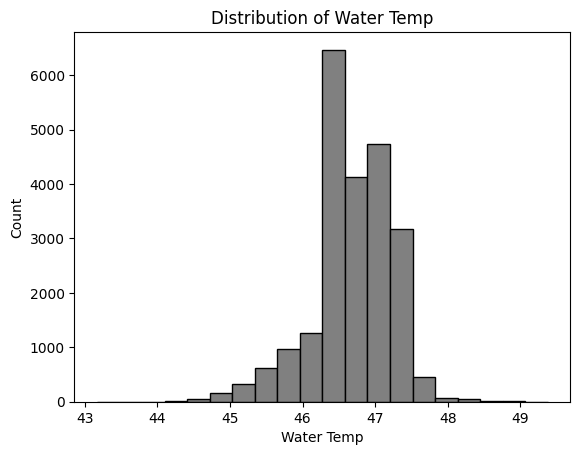

In [35]:
figure, ax = plt.subplots()
ax.hist(new_df['Water_Temp'],bins=20, color="grey", edgecolor='black') # specify bins, color, and edge color
ax.set_xlabel('Water Temp') # x axis label
ax.set_ylabel('Count') # y axis label
ax.set_title('Distribution of Water Temp') # add title
plt.show()